# Analisis de Datos Tarea 5 Regresión Logistica
# Tutor: Ferley Medina Rojas*

# Introducción
La siguiente actividad, desarrolla el ejercicio de regresion logistica el cual intentara predecir, si la persona pudo o no sobrevivir segun diversas variables como lo podran ser la edad, el sexo o la clase en la que se ubicaba al interior del barco.
Para llevar a cabo esto se hace necesario, primero estudiar la base de datos, ajustar la base de datos y limpiar la base de datos, posterior a esto se seleccionaran las variables mas Representativas

**Procedo a importar las librerias**

In [53]:
#cargar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#librerias ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression regresion 
from sklearn.metrics import classification_report, confusion_matrix

<font color='red'> **Cargo el archivo en esta parte se carga el archivo titanic**</font>

In [54]:
Datos = pd.DataFrame(pd.read_csv('Titanic1.csv'))


In [55]:
Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# En esta parte se cambia el encabezado pues aparecen en ingles, como buenas practicas se pasa a español

In [56]:
Datos.columns = ['IdPasajero', 'Sobrevivió', 'Clase', 'Nombre', 'Sexo', 'Edad', 'ParientesSibSp', 'ParientesParch', 'Boleto', 'Tarifa', 'Cabina', 'Embarcado']

**Valido los Cambios para verificar los nuevos nombres**

In [57]:
Datos.head(10)

,IdPasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,ParientesSibSp,ParientesParch,Boleto,Tarifa,Cabina,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# En esta parte valido el tipo de dato que tengo para cada una de las columnas

In [58]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdPasajero      891 non-null    int64  
 1   Sobrevivió      891 non-null    int64  
 2   Clase           891 non-null    int64  
 3   Nombre          891 non-null    object 
 4   Sexo            891 non-null    object 
 5   Edad            714 non-null    float64
 6   ParientesSibSp  891 non-null    int64  
 7   ParientesParch  891 non-null    int64  
 8   Boleto          891 non-null    object 
 9   Tarifa          891 non-null    float64
 10  Cabina          204 non-null    object 
 11  Embarcado       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font color='red'>
En este caso se tienen variables que no son representativas como lo son Parientes SIB, Parientes Parch, Boleto, por lo que se  procede a borrar estos datos como parte de la limpieza, el sexo se convierte a tipo int para una posible regresion analizando estas 2 variables </font>*

In [59]:
Datos = Datos.drop(columns=['ParientesSibSp', 'ParientesParch', 'Boleto'])

In [60]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IdPasajero  891 non-null    int64  
 1   Sobrevivió  891 non-null    int64  
 2   Clase       891 non-null    int64  
 3   Nombre      891 non-null    object 
 4   Sexo        891 non-null    object 
 5   Edad        714 non-null    float64
 6   Tarifa      891 non-null    float64
 7   Cabina      204 non-null    object 
 8   Embarcado   889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


# En esta parte tenemos el sexo de la persona en (tipo objet), lo paso a entero de forma que 0= sea hombre y 1 sea = Mujer

In [61]:
Datos['Sexo'] = Datos['Sexo'].replace({'male': 0, 'female': 1})

In [62]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IdPasajero  891 non-null    int64  
 1   Sobrevivió  891 non-null    int64  
 2   Clase       891 non-null    int64  
 3   Nombre      891 non-null    object 
 4   Sexo        891 non-null    int64  
 5   Edad        714 non-null    float64
 6   Tarifa      891 non-null    float64
 7   Cabina      204 non-null    object 
 8   Embarcado   889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Listo nuevamente los datos para verificar los Cambios

In [11]:
Datos.head(10)

,IdPasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,Tarifa,Cabina,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,30.0708,NaN,C


# En este caso las columnas Tarifa, Cabina y Embarcado no son representativas por lo que las podemos borrar

In [63]:
Datos = Datos.drop(columns=['Tarifa', 'Cabina', 'Embarcado'])

In [13]:
Datos.head(10)

,IdPasajero,Sobrevivió,Clase,Nombre,Sexo,Edad
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0
5,6,0,3,"Moran, Mr. James",0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0


**En esta parte tengo unas variables que pueden ser candidatas para la regresion lineal, sin embargo la edad tiene valores no nulos por lo que procedo a listar el contenido** 

In [65]:
valores_faltantes_edad = Datos['Edad'].isnull().sum()
print("Valores faltantes en la columna 'Edad':", valores_faltantes_edad)

Valores faltantes en la columna 'Edad': 177


**Como se tiene una base de datos con tantos faltantes, es mejor reemplazarlos por un valor como la moda, media o mediana, para esto calculo primero esa informacion**

In [15]:
moda_edad = Datos['Edad'].mode()
media_edad = Datos['Edad'].mean()
mediana_edad = Datos['Edad'].median()

print("Moda de la edad:", moda_edad)
print("Media de la edad:", media_edad)
print("Mediana de la edad:", mediana_edad)

Moda de la edad: 0    24.0
Name: Edad, dtype: float64
Media de la edad: 29.69911764705882
Mediana de la edad: 28.0


**Como se tiene una moda, media y mediana relativamente cercanas podemos reemplazar los valores faltantes con la media de la edad**

In [66]:
# Calcular la media de la edad
media_edad = Datos['Edad'].mean()

# Reemplazar los valores faltantes en la columna 'Edad' con la media
Datos['Edad'] = Datos['Edad'].fillna(media_edad)

**Validamos que se no se tengan faltantes en la columna edad**

In [67]:
valores_faltantes_edad = Datos['Edad'].isnull().sum()
print("Valores faltantes en la columna 'Edad':", valores_faltantes_edad)

Valores faltantes en la columna 'Edad': 0


# los datos quedaron ajustados, se pude borrar el nombre y el ID tambien pues estos son mas informativos

In [68]:
Datos = Datos.drop(columns=['IdPasajero', 'Nombre'])

In [69]:
Datos.head(10)

,Sobrevivió,Clase,Sexo,Edad
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
5,0,3,0,29.699118
6,0,1,0,54.000000
7,0,3,0,2.000000
8,1,3,1,27.000000
9,1,2,1,14.000000


**Genero Graficas**

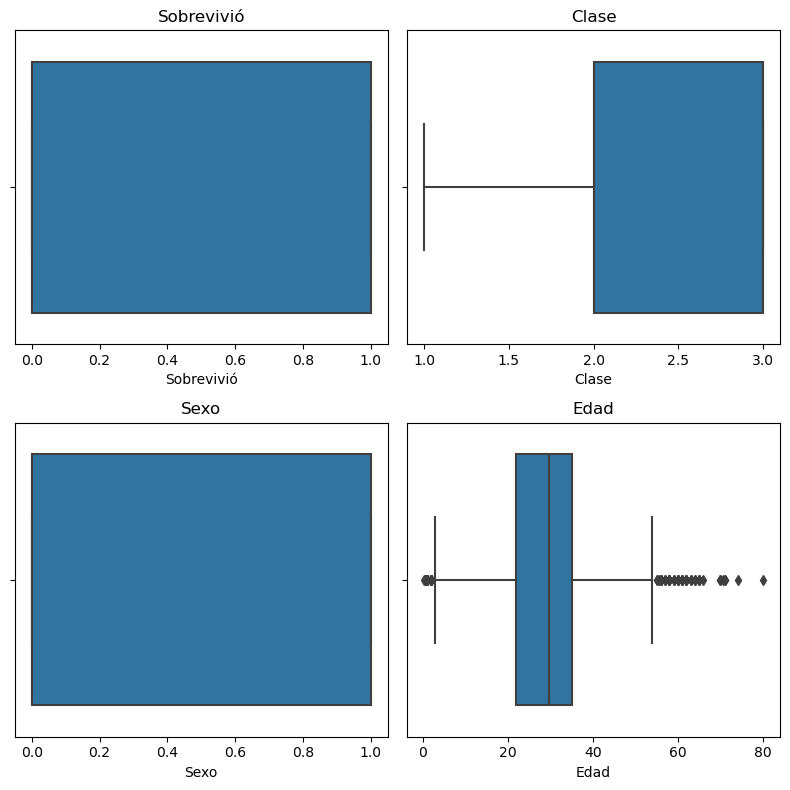

In [70]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Sobrevivió', 'Clase', 'Sexo', 'Edad']
sns.boxplot(x=Datos['Sobrevivió'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos['Clase'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=Datos['Sexo'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=Datos['Edad'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

## Analisis de Graficas
En esta primera etapa se observa que para las variables sexo, sobrevivio, la clase y la edad, los valores son validos, pues en sobrevivio solo tienen 2 opciones 0 y 1,en este contexto de los datos del Titanic, el valor '0' en la columna significa que el pasajero no sobrevivió al naufragio, mientras que un valor 1 indica que el pasajero sí sobrevivió.
lo mismo sucede con el sexo y la clase pues para nuestro caso la clase es la categoria a la que pertenecia el pasajero la cual estaba entre 1-3 y el sexo quedo establecido como 0 hombre y 1 mujer
Finalmente en la edad, se observa algo interesante y es que Esta presenta diversos valores, los cuales oscilan entre 0 y 80 años, siendo la media 29 años

# Como no se tienen valores Atipicos no se procede a realizar ninguna otra depuracion

In [21]:
Datos.head(20)

,Sobrevivió,Clase,Sexo,Edad
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
5,0,3,0,29.699118
6,0,1,0,54.000000
7,0,3,0,2.000000
8,1,3,1,27.000000
9,1,2,1,14.000000


In [71]:
print(Datos.dtypes)

Sobrevivió      int64
Clase           int64
Sexo            int64
Edad          float64
dtype: object


# Genero Graficos

 # <Center> Diagramas de barras </center>

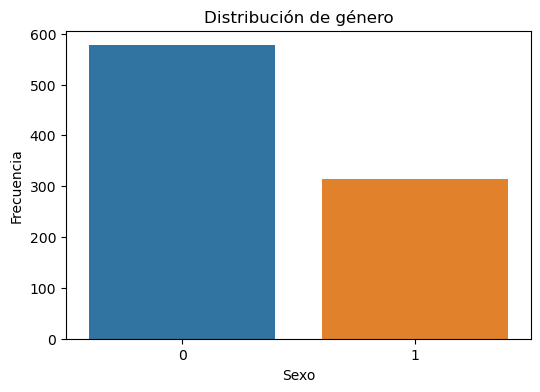

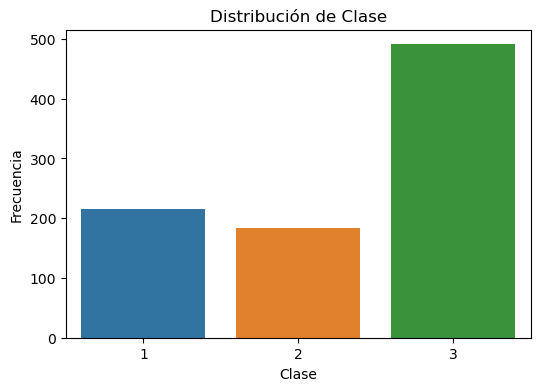

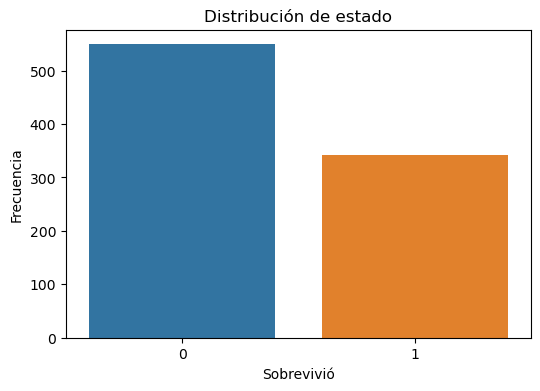

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sexo', data=Datos)
plt.title('Distribución de género')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Clase', data=Datos)
plt.title('Distribución de Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Sobrevivió', data=Datos)
plt.title('Distribución de estado')
plt.xlabel('Sobrevivió')
plt.ylabel('Frecuencia')
plt.show()

# Analisis 
**Aqui observamos claramente que la mayoria de las personas de la muestra no sobrevivieron, la mayoria de las personas de la muestra pertenecian a estrato 3 y la mayoria de las personas de la muestra eran hombres**

**Diagramas de dispersion**

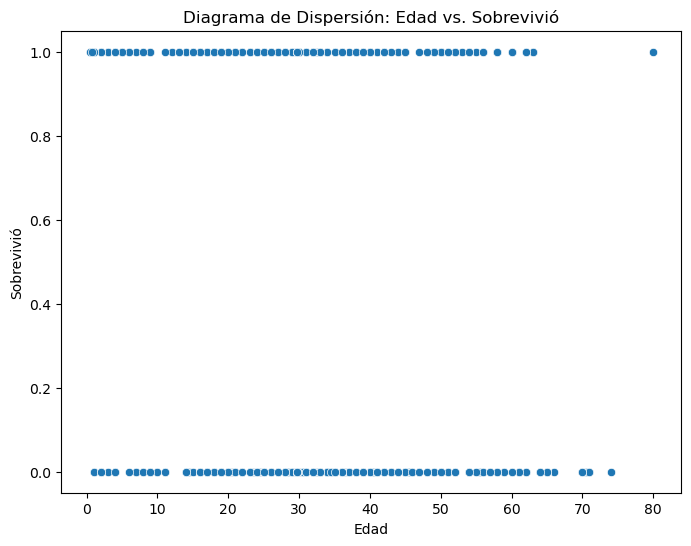

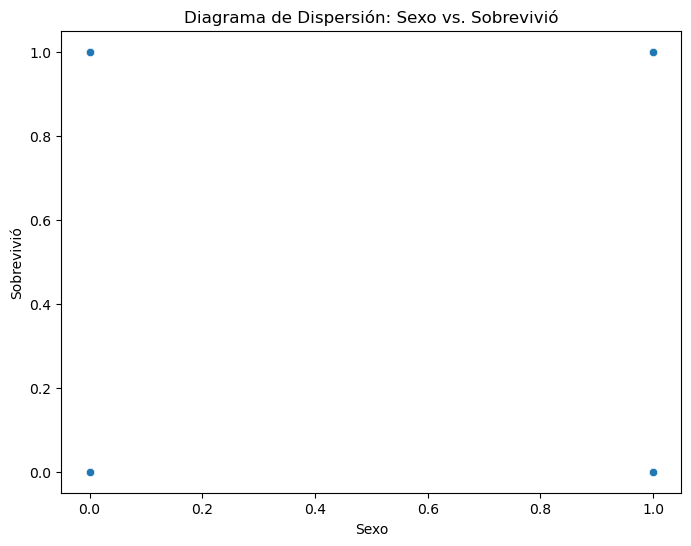

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Edad', y='Sobrevivió', data=Datos)
plt.title('Diagrama de Dispersión: Edad vs. Sobrevivió')
plt.xlabel('Edad')
plt.ylabel('Sobrevivió')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sexo', y='Sobrevivió', data=Datos)
plt.title('Diagrama de Dispersión: Sexo vs. Sobrevivió')
plt.xlabel('Sexo')
plt.ylabel('Sobrevivió')
plt.show()


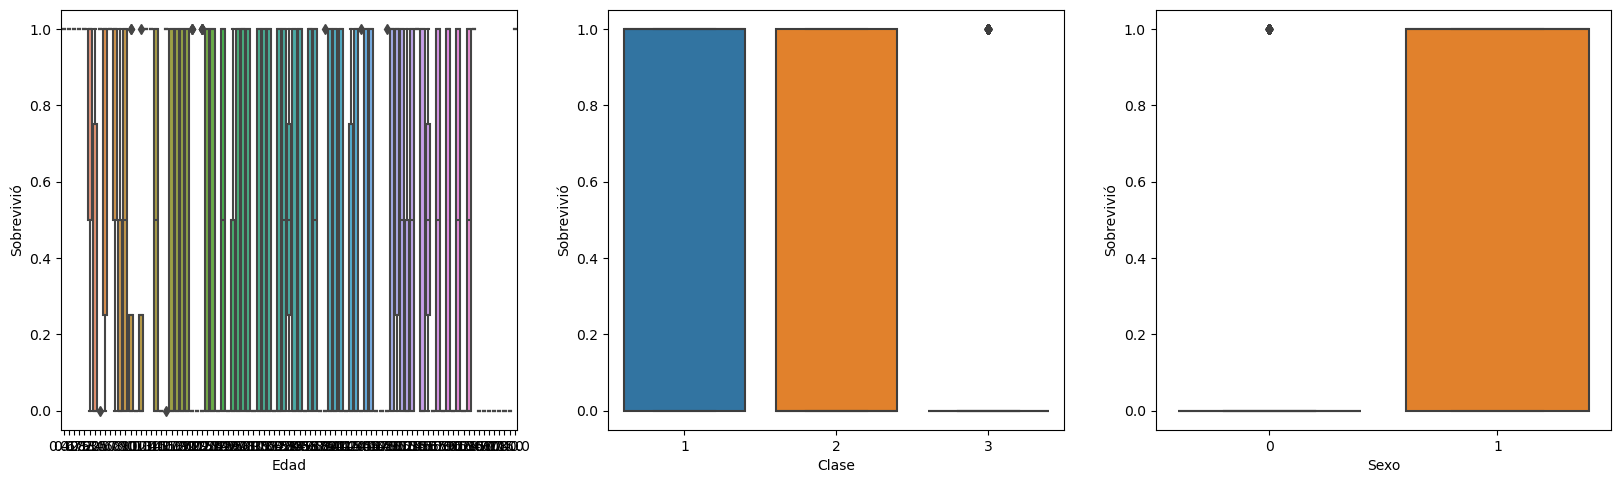

In [72]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Edad', y = 'Sobrevivió', data = Datos)
plt.subplot(2,3,2)
sns.boxplot(x = 'Clase', y = 'Sobrevivió', data = Datos)
plt.subplot(2,3,3)
sns.boxplot(x = 'Sexo', y = 'Sobrevivió', data = Datos)
plt.show()


<h1><span style="color:red">analisis</span>

En este caso en las graficas se observan diferentes clases sociales, las cuales van de 1 a 3 al interior del barco, el sexo se identficica con el numero 0 para hombre 1 para mujer, y finalmente en el estado de la persona si sobrevivio o no con 0 se dice que no y con 1 que sia.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

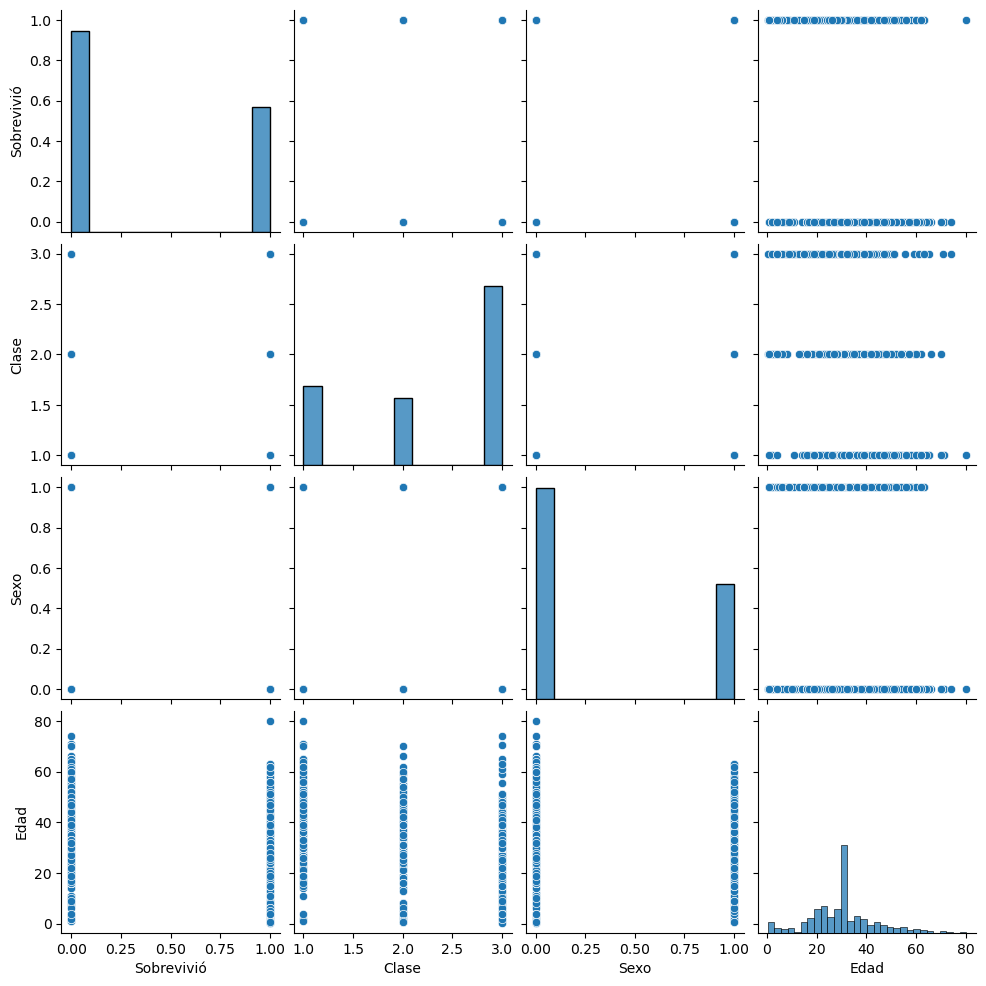

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Datos)
plt.show()

# Seleccion de caracteristicas mas relevantes del Modelo

<font color='red'> En este Modelo Propuesto la caracteristica de interes es si la persona sobrevivio o no al naufragio</font> <br>**Sobrevivió <br>0= NO SOBREVIVIO <br> 1= SOBREVIVIO**


In [75]:
Datos['Clase'].value_counts()

Clase
3    491
1    216
2    184
Name: count, dtype: int64

In [28]:
Datos['Sobrevivió'].value_counts()

Sobrevivió
0    549
1    342
Name: count, dtype: int64

In [29]:
Datos['Sexo'].value_counts()

Sexo
0    577
1    314
Name: count, dtype: int64

In [76]:
Datos['Edad'].value_counts()

Edad
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

# Divido los datos En Train & TesT para evaluar el Modelo**

In [77]:
#se Utiliza el 75% para train y 25% para prueba
x=Datos.drop('Sobrevivió',axis=1)
y=Datos['Sobrevivió']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y, random_state=0)

In [78]:
print(x_train)

     Clase  Sexo       Edad
671      1     0  31.000000
417      2     1  18.000000
634      3     1   9.000000
323      2     1  22.000000
379      3     0  19.000000
..     ...   ...        ...
131      3     0  20.000000
490      3     0  29.699118
528      3     0  39.000000
48       3     0  29.699118
80       3     0  22.000000

[668 rows x 3 columns]


In [79]:
print(y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Sobrevivió, Length: 668, dtype: int64


**<H1>**Entrenar el modelo configurando parametros**</h1>

In [80]:
#basicamente se exporta una libreria
modelo_regresion= LogisticRegression(solver="liblinear")
#modelo_regresion= LinearRegression(solver="liblinear")
modelo_regresion.fit(x_train, y_train)
Prediccion= modelo_regresion.predict(x_test)

In [81]:
print(y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Sobrevivió, Length: 223, dtype: int64


In [82]:
print(Prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


# Se evalua el desempeño del modelo

El modelo genera una prediccion, segun la informacion anterior que se imprimio

In [83]:
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.77      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



# analisis 
**En este caso, la precisión para la clase 0 (no sobrevivió) es del 81%, lo que indica que el 81% de las predicciones de no sobrevivientes fueron correctas. Para la clase 1 (sobrevivió), la precisión es del 77%, lo que significa que el 77% de las predicciones de sobrevivientes fueron correctas 
el recall para la clase 0 (no sobrevivió) es del 88%, lo que indica que el 88% de los no sobrevivientes fueron identificados correctamente. Para la clase 1 (sobrevivió), el recall es del 66%, lo que significa que el 66% de los sobrevivientes fueron identificados correctamente.
el F1-score para la clase 0 es del 84%, y para la clase 1 es del 71%.**

# Graficas Matriz de Confusion

Matriz de Confusión:
[[120  17]
 [ 29  57]]


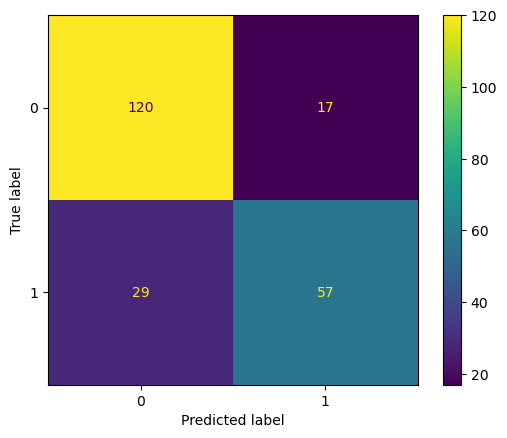

In [84]:
#matriz de Confusion
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Matriz de Confusión:")
print(cm)

# <span style="color:red">Interpretar y analizar resultados</span>
# 120 veces el algoritmo predijo que la persona no sobrevivió, lo cual fue correcto, 57 veces el algoritmo dijo que la persona no sobrevivió y efectivamente no sobrevivieron. <br> en los errores el modelo predijo que 29 personas no sobrevivieron pero estas si sobrevivieron y en 17 casos el modelo dijo que estas personas NO sobrevivirían pero estas si sobrevivieron


**<h1> Curva de Precision del Modelo**

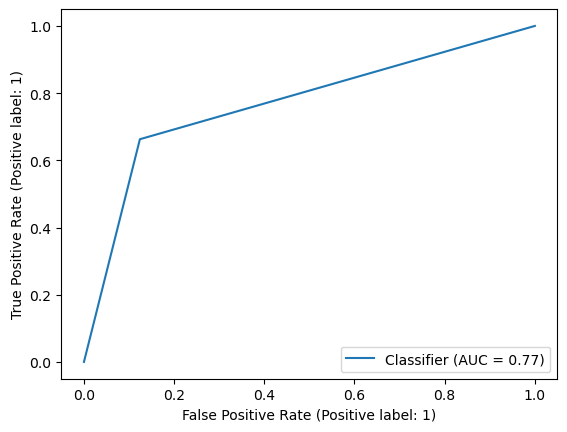

In [85]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

# <span style="color:red"> Para nuestro caso de estudio, se tiene un AUC de 0.77 <br> Esto indica que el modelo tiene una capacidad moderadamente buena para clasificar correctamente las muestras en función de las predicciones realizadas.</span>

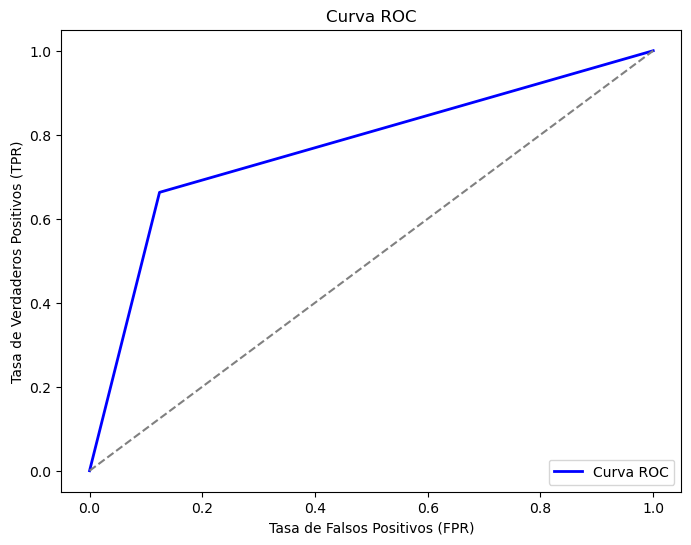

In [86]:
# Calcular la curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Prediccion)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, Prediccion)

**<h1> Curva de Precision Recall**

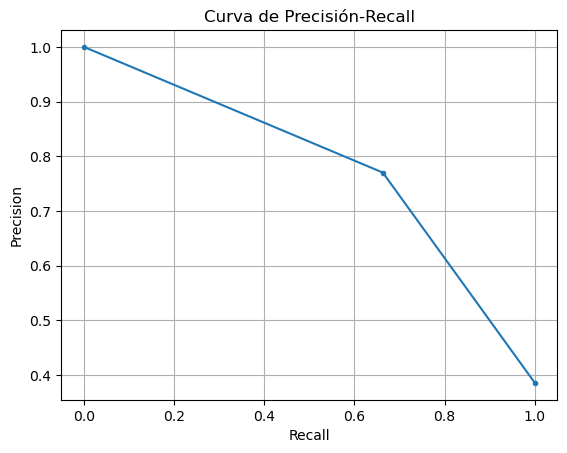

In [42]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.grid(True)
plt.show()

# <span style="color:red">Conclusiones  & resultados</span>

**Del desempeño del modelo podemos decir que:**<br>
Como la Precisión del modelo mide la proporción de predicciones positivas verdaderas realizadas por el modelo, la precisión para la clase "Sobrevivió" es de 0.81, lo cual nos permite inferior que del 81% de los casos predichos como NO sobrevivió eran verdad. 
<br>
Teniendo en cuanta que el Recall mide la proporción de predicciones positivas verdaderas entre todas las instancias se obtuvo el recall para la clase 0 (no sobrevivió) del 88%, lo que indica que el 88% de los no sobrevivientes fueron identificados correctamente, mientras que para la clase 1 (sobrevivió), el recall fue del 66%, lo que significa que el 66% de los sobrevivientes fueron identificados correctamente.<br>
Respecto al F1-Score, esta media armónica de precisión y recuperación, se encarga de proporcionar una única puntuación que equilibra la precisión y el Recall, el resultado de nuestro caso fue del 84% para la clase NO SOBREVIVIÓ y 71% para la Clase SOBREVIVIÓ
<br>
Respecto a la curva de precisión del modelo, se obtuvo un valor de 0.77, lo que significa que el 69% de las predicciones del clasificador son correctas en todos los umbrales de clasificación
Por ultimo de la matriz de confusion se obtuvo que: <br>
120 veces el algoritmo predijo que la persona no sobrevivió, siendo correcto <br>57 veces el algoritmo dijo que la persona no sobrevivió fue correcto <br>El modelo predijo que 29 personas no sobrevivieron pero estas sobrevivieron(Error)<br> En 17 casos el modelo dijo que estas personas NO sobrevivirían pero estas si sobrevivieron(Error)

**Bibliografia**

Carlos Véliz. (2020). Aprendizaje automático. Introducción al aprendizaje profundo. El Fondo Editorial de la Pontificia Universidad Católica del Perú.https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=2600876&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_I Cap 3, 4, 5 y 6 
<br>
<br>
David Julian. (2016). Designing Machine Learning Systems with Python. Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1218065&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_Cover. Cap 2
<br>
<br>
Giuseppe Bonaccorso. (2018). Machine Learning Algorithms : Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1881497&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_Cover Cap 3, 4, 5 y 8
<br>
<br>
Minguillón, J. Casas, J. y Minguillón, J. (2017). Minería de datos: modelos y algoritmos. Editorial UOC. https://elibro-net.bibliotecavirtual.unad.edu.co/es/ereader/unad/58656. Cap 4, 5, 13
<br>
<br>
Pratap Dangeti. (2017). Statistics for Machine Learning : Build Supervised, Unsupervised, and Reinforcement Learning Models Using Both Python and R. 
<br>
Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1560931&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_Cover Cap 2, 3 y 4
<br>
<br>
Romero Villafranca, R. y Zúnica Ramajo, L. (2020). Métodos estadísticos para ingenieros. Editorial de la Universidad Politécnica de Valencia. https://elibro-net.bibliotecavirtual.unad.edu.co/es/ereader/unad/129644. Cap 12